In [2]:
#import necessary libraries
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

Data Collection

In [3]:
#Read the datasets
df = pd.read_csv('measures_v2.csv')
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


Text(0, 0.5, 'Count')

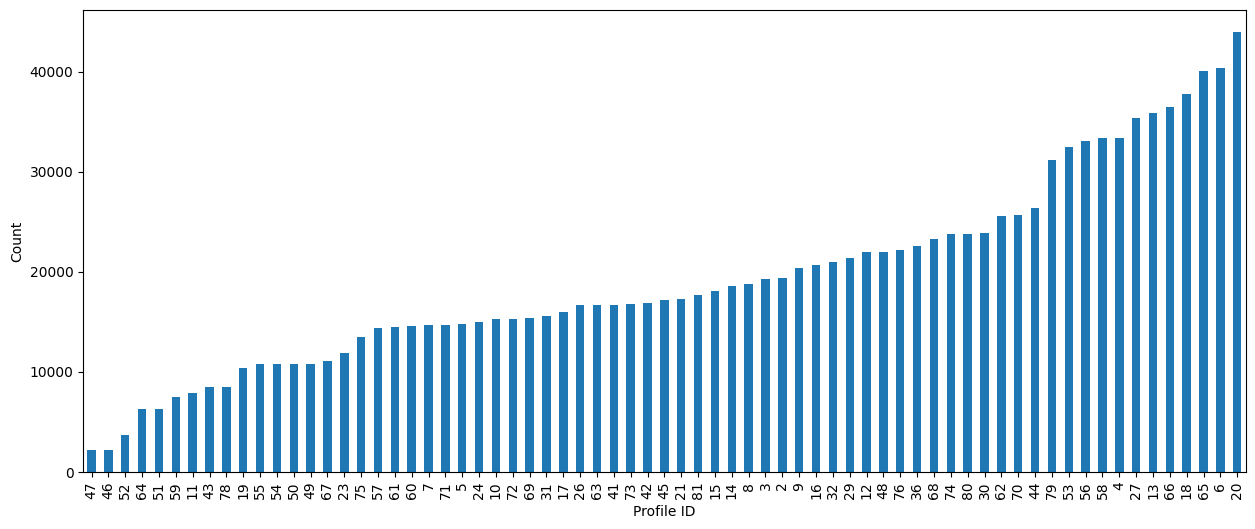

In [4]:
#Univariate analysis
#Bar Graph
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')
plt.xlabel('Profile ID')
plt.ylabel('Count')

In [5]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

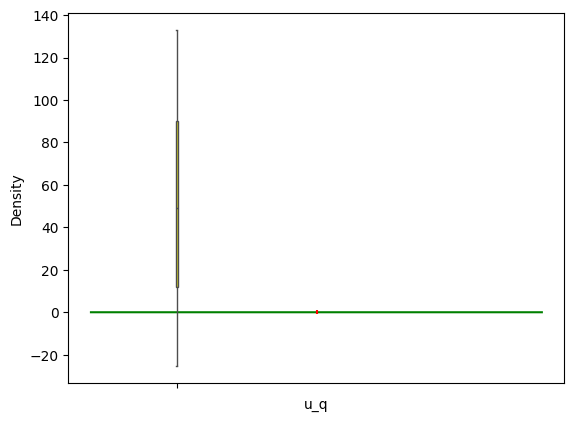

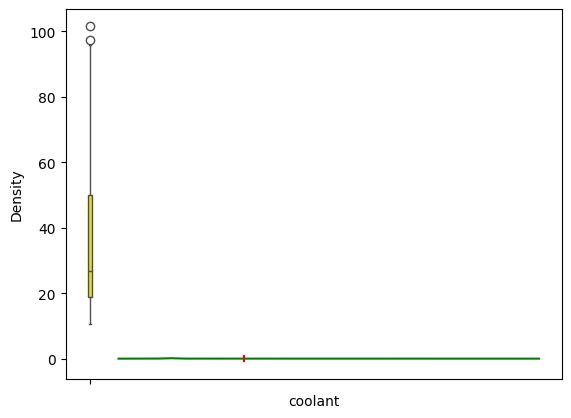

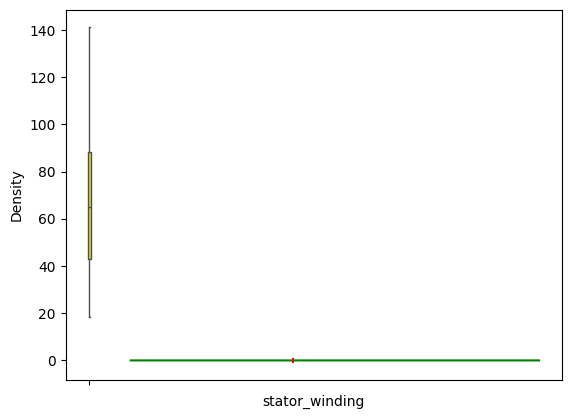

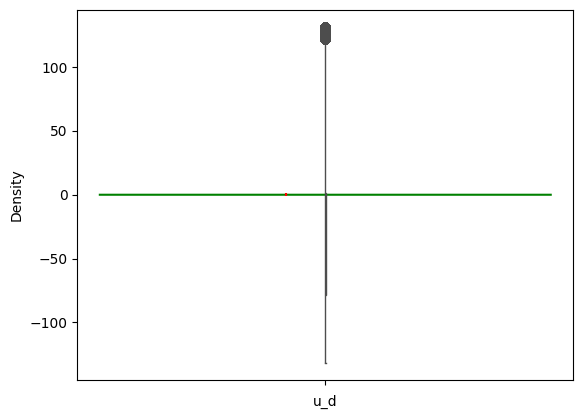

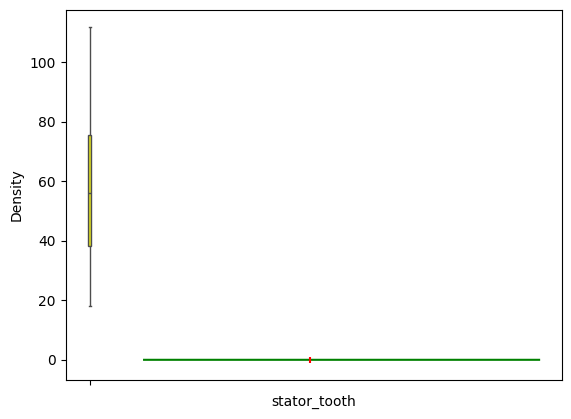

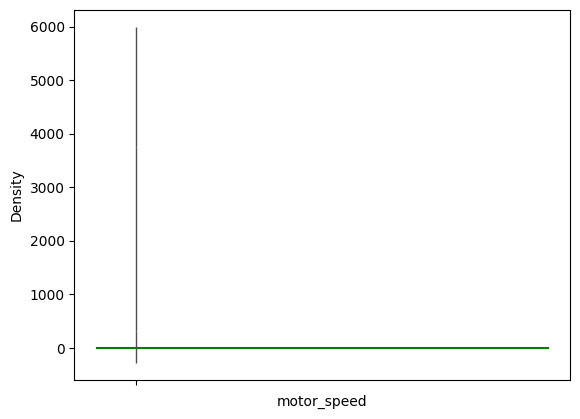

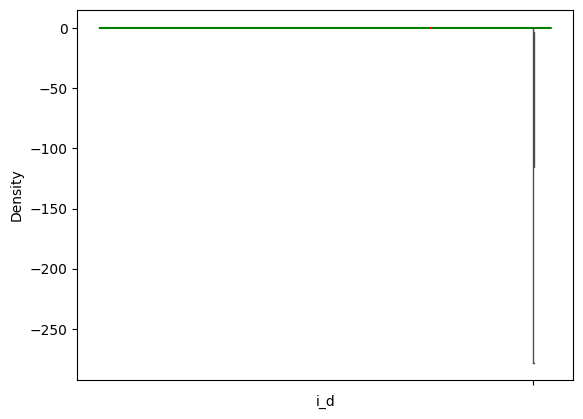

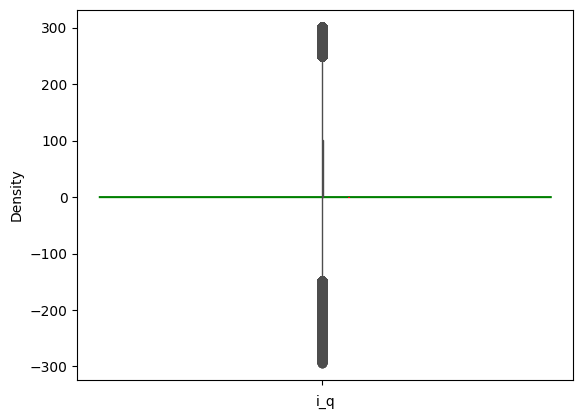

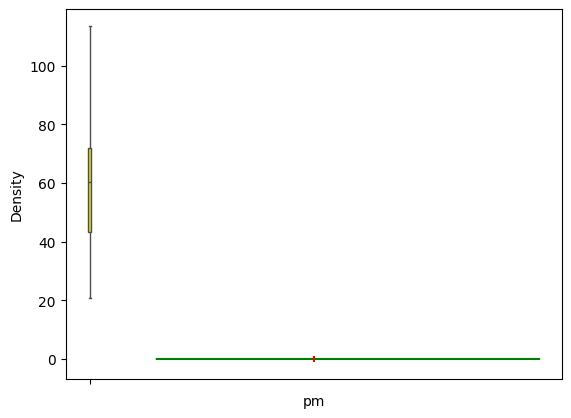

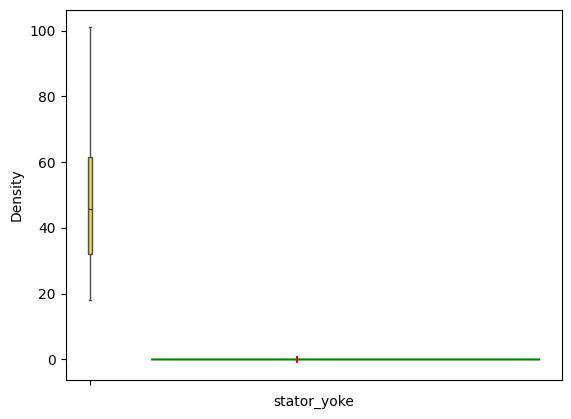

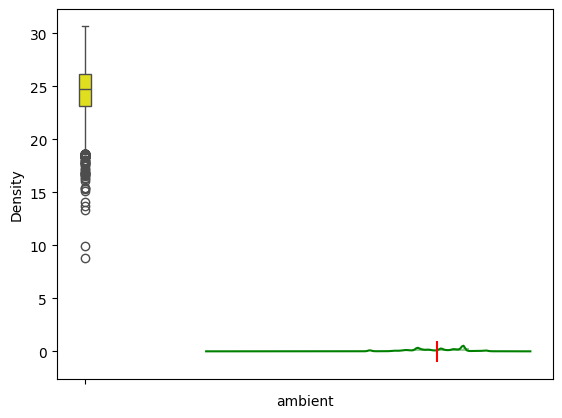

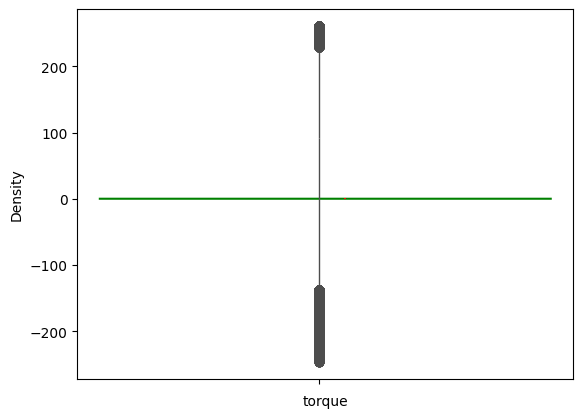

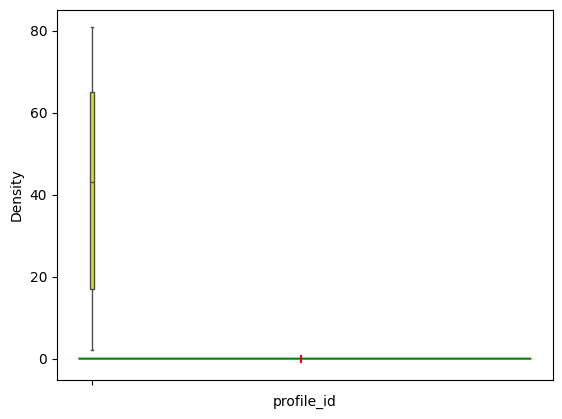

In [6]:
#Plotting Distribution plot and Boxplot for all the features to check for skewness
for i in df.columns:
  sns.distplot(df[i], color='green')
  sns.boxplot(df[i], color='yellow')
  plt.vlines(df[i].mean(), ymin=-1, ymax=1, color='red')
  plt.show()

<Axes: xlabel='i_q', ylabel='pm'>

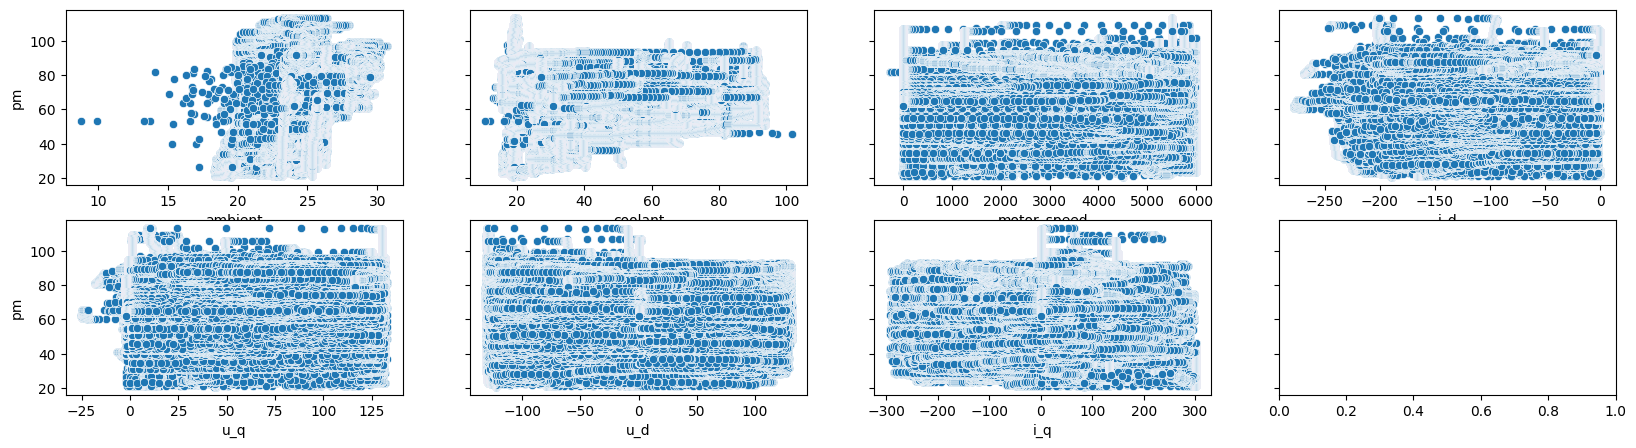

In [7]:
#Multi-variate analysis
#Scatterplot
fig, axes = plt.subplots(2, 4, figsize=(20, 5), sharey=True)
sns.scatterplot(x=df['ambient'], y=df['pm'], ax = axes[0][0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax = axes[0][1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax = axes[0][2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax = axes[0][3])
sns.scatterplot(x=df['u_q'], y=df['pm'], ax = axes[1][0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax = axes[1][1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax = axes[1][2])

<Axes: >

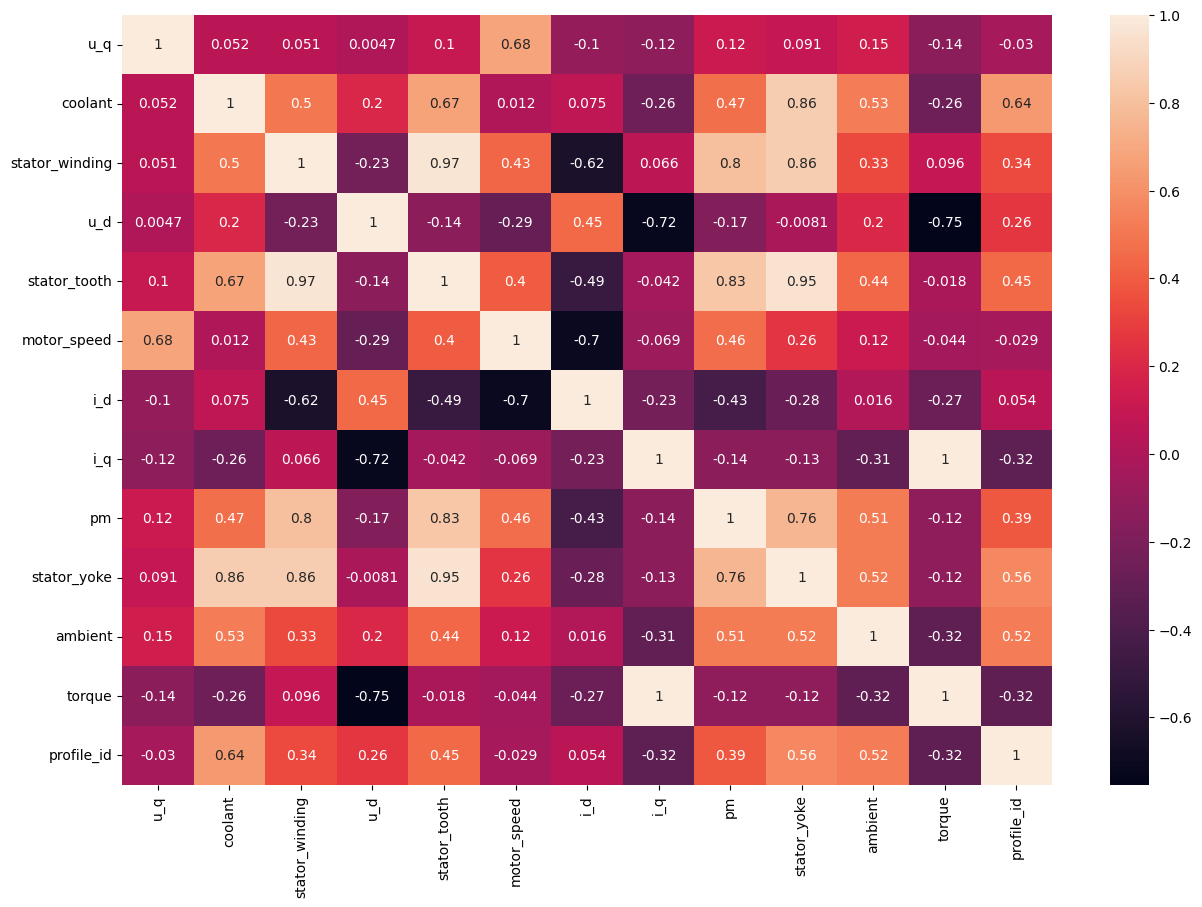

In [8]:
#Heat-Map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

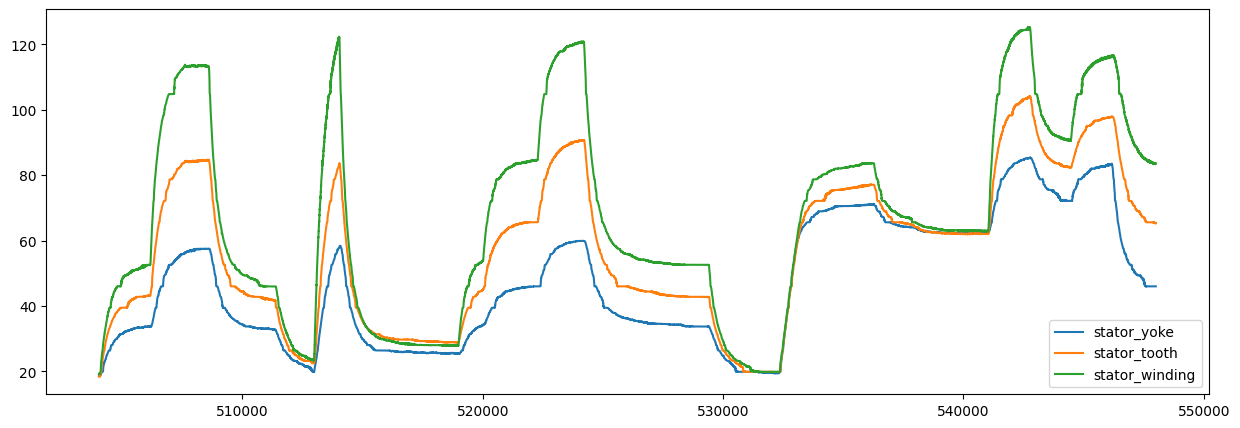

In [9]:
#For a random measurement, we can try to compare the temperature of the 3 stator components
plt.figure(figsize=(15, 5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator_yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator_tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator_winding')
plt.legend()

In [10]:
df.drop('profile_id', axis = 1, inplace = True)
#df_test.drop('profile_id', axis = 1, inplace = True)

In [11]:
#Descriptive analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [12]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


Data Pre-Processing:

In [13]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


In [14]:
#Drop unwanted features
df.drop(['stator_yoke', 'stator_tooth', 'stator_winding', 'torque'], axis = 1)

,u_q,coolant,u_d,motor_speed,i_d,i_q,pm,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,24.554214,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,24.538078,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,24.544693,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,24.554018,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,24.565397,19.850639
...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,0.791801,0.000380,-2.000169,1.097528,62.147780,23.989078
1330812,-2.258684,30.721306,0.778900,0.002985,-2.000499,1.097569,62.142646,23.970700
1330813,-2.130312,30.721312,0.804914,0.002301,-1.999268,1.098765,62.138387,23.977234
1330814,-2.268498,30.721316,0.763091,0.005662,-2.000999,1.095696,62.133422,24.001421


In [15]:
#Checking for null values
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
dtype: int64

In [16]:
#Handling outliers
#In our Dataset all the values are in the same range, so outliers replacing is not necessary.

In [17]:
features_to_drop = ['pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque']
X = df.drop(columns=features_to_drop)

In [18]:
#Normalizing the values
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.transform(X)
y = df['pm']
y_df_test = df['pm']
X = pd.DataFrame(X, columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q'])
X_df_test = pd.DataFrame(X_df_test, columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q'])
y.reset_index(drop = True, inplace = True)
y_df_test.reset_index(drop = True, inplace = True)

In [19]:
#Saving the transformation
joblib.dump(mm, 'transform.save')

['transform.save']

In [20]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Model Building:

In [21]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
#Decision tree model
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [ ]:
#Support Vector Machine model
svm = SVR()
svm.fit(X_train, y_train)

In [ ]:
#Compare the models and Evaluating performance of the model

y_pred_lr = lr.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Root Mean Squared Error LR: {rmse_lr:.2f}")
print(f"R-squared LR: {r2_lr:.2f}\n\n")

y_pred_dr = dr.predict(X_test)
rmse_dr = root_mean_squared_error(y_test, y_pred_dr)
r2_dr = r2_score(y_test, y_pred_dr)
print(f"Root Mean Squared Error DR: {rmse_dr:.2f}")
print(f"R-squared DR: {r2_dr:.2f}\n\n")

y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Root Mean Squared Error RF: {rmse_rf:.2f}")
print(f"R-squared RF: {r2_rf:.2f}\n\n")

y_pred_svm = svm.predict(X_test)
rmse_svm = root_mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"Root Mean Squared Error SVM: {rmse_svm:.2f}")
print(f"R-squared SVM: {r2_svm:.2f}")


Root Mean Squared Error LR: 11.97
R-squared LR: 0.60


Root Mean Squared Error DR: 2.52
R-squared DR: 0.98




In [ ]:
#saving the model
joblib.dump(lr, 'model_lr.save')
joblib.dump(dr, 'model_dr.save')
joblib.dump(rf, 'model_rf.save')
joblib.dump(svm, 'model_svm.save')

['model_dr.save']